# Periodic Boundary Conditions 

Most simplest implementation. These functions all take two vectors ``x0`` and ``x1``, a box size ``Box`` (also a vector, same dimension as ``x0``). We assume the convention that the Box is defined from $-L/2$ to $L/2$ and that the origin is at $[0,0,0]$. 

In [1]:
import numpy as np 

In [2]:
def dist(x1,x0):
    """Calculates distance between two points x1 and x0.

    Args:
        x0: vector (list or np array)
        x1: vector (list or np array)

    Returns: 
        dist: float - distance between x1 and x0
    """
    
    x1 = np.array(x1)
    x0 = np.array(x0)
    
    delta = x1 - x0
    dist = np.sqrt(delta[0]**2+delta[1]**2+delta[2]**2)
    
    return dist

def dist_pbc(x1,x0,Box):
    """Calculates distance between two points x1 and x0 with taking periodic boundary conditions into account.

    All args must have the same dimension. 
    
    Args:
        x0: vector (list or np array)
        x1: vector (list or np array)
        Box: vector (list or np array)
        
    Returns: 
        dist: float - distance between x1 and x0, wrapped into the box 
    """
    x1 = np.array(x1)
    x0 = np.array(x0)
    Box = np.array(Box)
    
    delta = x1 - x0
    for i in [0,1,2]:
        if delta[i] > 0.5*Box[i]:
            delta[i] = Box[i] - delta[i] 
        if delta[i] < - 0.5*Box[i]:
            delta[i] = Box[i] + delta[i]
        
    return np.linalg.norm(delta)

## Try the Functions

In [3]:
Box = [10,10,10]

In [4]:
points_A = [2.0,3,1]
points_D = [-4.0,0,0]

In [5]:
dist_no_pbc = dist(points_A,points_D)
dist_with_pbc = dist_pbc(points_A,points_D,Box)

print(dist_no_pbc, dist_with_pbc)

6.782329983125268 5.0990195135927845


## Tests 

A metric needs to fulfill the following: 

1. symmetry $g(x,y) = g(y,x)$
2. identity $g(x,x) = 0$ (also means that $g(y,x)=0 \rightarrow x=y$)
3. triangle inequality  $g(x,y)+g(y,z)\geq g(x,z)$

First, let's test an obvious input:

In [6]:
d = dist_pbc([0,0,0],[0,0,1],Box)
print(d)

1.0


Test symmetry  $g(x,y)=g(y,x)$:

In [7]:
dist_with_pbc_AD = dist_pbc(points_A,points_D,Box)
dist_with_pbc_DA = dist_pbc(points_A,points_D,Box)

same = np.array_equal(dist_with_pbc_AD,dist_with_pbc_DA)
print("dist AD", dist_with_pbc_AD, "dist DA",dist_with_pbc_DA,"same? ",same)

dist AD 5.0990195135927845 dist DA 5.0990195135927845 same?  True


Test $g(x,x)=0$:

In [9]:
dist_with_pbc_AA = dist_pbc(points_A,points_A,Box)

same = np.array_equal(dist_with_pbc_AA,0)
print("dist AA", dist_with_pbc_AA,"zero? ",same)

dist AA 0.0 zero?  True


Test inequality  $g(x,y)+g(y,z)\geq g(x,z)$:

In [10]:
points_E = [-4,4,0]

dist_with_pbc_AE = dist_pbc(points_A,points_E,Box)
dist_with_pbc_DE = dist_pbc(points_D,points_E,Box)

print(dist_with_pbc_AD, "+" , dist_with_pbc_DE,"=",dist_with_pbc_AD + dist_with_pbc_DE,">=", dist_with_pbc_AE)
print(dist_with_pbc_AD + dist_with_pbc_DE >= dist_with_pbc_AE)

5.0990195135927845 + 4.0 = 9.099019513592784 >= 4.242640687119285
True


Note that this function cannot take a list of points, which is a quite common calculation in simulations, e.g., compute all distances of one particle to all other particles in the system.

## Alternative Implementations 

In [11]:
def dist_pbc_1(x1,x0,Box):
    x1 = np.array(x1)
    x0 = np.array(x0)
    Box = np.array(Box)
    
    delta = x1 - x0
    for i in [0,1,2]:
        if delta[i] > 0.5*Box[i]:
            delta[i] = Box[i] - delta[i] 
        if delta[i] < - 0.5*Box[i]:
            delta[i] = Box[i] + delta[i]
        
    return np.linalg.norm(delta)



d = dist_pbc_1(points_A,points_D,Box)
print(d)


5.0990195135927845


In [12]:
d = dist_pbc_1([points_A],[points_D],Box)
print(d)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
def dist_pbc_2(x1,x0,Box):
    """Calculates distance between two points x1 and x0 with taking periodic boundary conditions into account.

    This function can also take input vectors of different dimensions, i.e a [list of points] vs. a point. In this case 
    the function will return a list of distances. 
    
    Args:
        x0: vector (list or np array)
        x1: vector (list or np array)
        Box: vector (list or np array)
        
    Returns: 
        dist: np array - distances between x1 and x0, wrapped into the box 
    """
    
    x1 = np.array(x1)
    x0 = np.array(x0)
    Box = np.array(Box) 
    
    delta = x1 - x0
    delta =  np.where(delta > 0.5 * Box, Box - delta,  np.where(delta <- 0.5 * Box, Box + delta, delta))
    
    return np.linalg.norm(delta,axis=1)



d = dist_pbc_2([points_A],[points_D],Box)
print(d)
d = dist_pbc_2([points_A,points_D],[points_D],Box)
print(d)
d = dist_pbc_2([points_A,points_D,points_A],[points_A,points_D,points_D],Box)
print(d)

[5.09901951]
[5.09901951 0.        ]
[0.         0.         5.09901951]


In [15]:
def dist_pbc_3(x1,x0,Box): 
    """
    
    """
    x1 = np.array(x1)
    x0 = np.array(x0)
    Box = np.array(Box) 
    
    delta = x1 - x0 
    delta -= np.floor(delta/(0.5*Box))*Box
    
    return np.linalg.norm(delta,axis=1)



d = dist_pbc_3([points_A],[points_D],Box)
print(d)
d = dist_pbc_3([points_A,points_D,points_A],[points_D],Box)
print(d)
d = dist_pbc_3([points_A,points_D,points_A],[points_A,points_D,points_D],Box)
print(d)

[5.09901951]
[5.09901951 0.         5.09901951]
[0.         0.         5.09901951]


# GoogleAI Code for PBC 

Prompt: "periodic boundary conditions in python" 

**Wrong:**
- Why is the position updated with velocity? Nobody asked for that...
- why are positions floats? Should they not be vectors?

Also note, even if we fix the ``velocity*dt``:
- Is ``new_position % box_length`` actually doing the right thing? (yes, but only if box is defined $[0,L]$
- This function actually takes a distance vector and not two positions, so expected input is different
- Ths function returns a distance vector (wrapped in PBC), so the length will need to be computed outside of this function 

In [16]:
import numpy as np

def update_position_pbc(position, velocity, dt, box_length):
    """Updates position with periodic boundary conditions."""
    new_position = position + velocity * dt
    # Apply periodic boundary condition
    new_position = new_position % box_length
    return new_position

# Example usage
box_length = 10.0
initial_position = 9.0
velocity = 2.0
dt = 1.0

final_position = update_position_pbc(initial_position, velocity, dt, box_length)
print(f"Initial position: {initial_position}")
print(f"Final position: {final_position}") # Expected output: 1.0

Initial position: 9.0
Final position: 1.0


In [17]:
def update_position_pbc(distance_vector, box_length):
    """Updates distance_vector with periodic boundary conditions."""
    # Apply periodic boundary condition
    distance_vector_new = distance_vector % box_length
    return distance_vector_new

In [23]:
dist = np.array([11.0,3,5]) 
box_length = np.array([10,10,10])

q = update_position_pbc(dist,box_length)
print("output distance vector",q)
print("length of that vector is ",np.linalg.norm(q))
q = dist_pbc_1(dist,[0.0,0,0],box_length)
print("comp.output of dist_pbc_1",q)

output distance vector [1. 3. 5.]
length of that vector is  5.916079783099616
comp.output of dist_pbc_1 5.916079783099616


HOOMD-blue ``minImage`` function:
https://github.com/glotzerlab/hoomd-blue/blob/a2e67782167d8f618f91b8ca7a8589f136493869/hoomd/BoxDim.h#L313

LAMMPS ``Domain::pnc()`` function: https://github.com/lammps/lammps/blob/173e79699c351a2c10ad50630b367bc22b67ae50/src/domain.cpp#L806

## Illustration of potential PBC Issues with Ordered Structures 

PBC can create all kinds of artificial effects (finite size, etc.), including the fact that things need to "fit" into the box. That means that for example large fluctuations are cut off, and other effects. It also means that periodic or ordered structures need to fit into the box as well. 

Consider a hexagonal 2D crystal in a periodic box: 

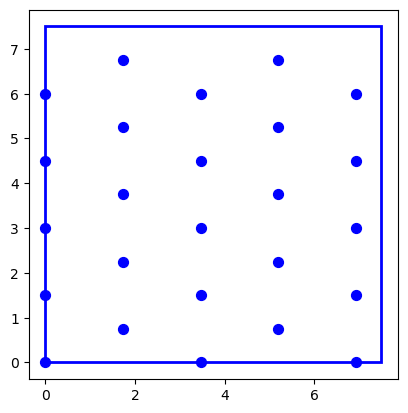

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle 

def create_hexagonal_lattice_coords(rows, cols, spacing=1.0):
    x_coords = []
    y_coords = []

    # Calculate horizontal and vertical spacing for a hexagonal grid
    hex_width = spacing * np.sqrt(3)
    hex_height = spacing * 1.5

    for r in range(rows):
        for c in range(cols):
            x = c * hex_width
            y = r * hex_height

            # Offset odd-numbered columns to create the hexagonal pattern
            if c % 2 != 0:
                y += hex_height / 2

            x_coords.append(x)
            y_coords.append(y)

    return np.array(x_coords), np.array(y_coords)

# Define lattice dimensions
num_rows = 5
num_cols = 5
particle_spacing = 1.0
box_L = 7.5 
# Generate coordinates
x_particles, y_particles = create_hexagonal_lattice_coords(num_rows, num_cols, particle_spacing)

# Create the scatter plot
fig, ax = plt.subplots(1,1)
rect = Rectangle((0, 0), width=box_L, height=box_L, facecolor='none', edgecolor='b', linewidth=2)
ax.add_patch(rect)
ax.scatter(x_particles, y_particles, s=50, color='blue', marker='o') 

ax.set_aspect('equal', adjustable='box') # Ensure equal aspect ratio for correct visualization
plt.show()

Looks good at first glance! But wait: 

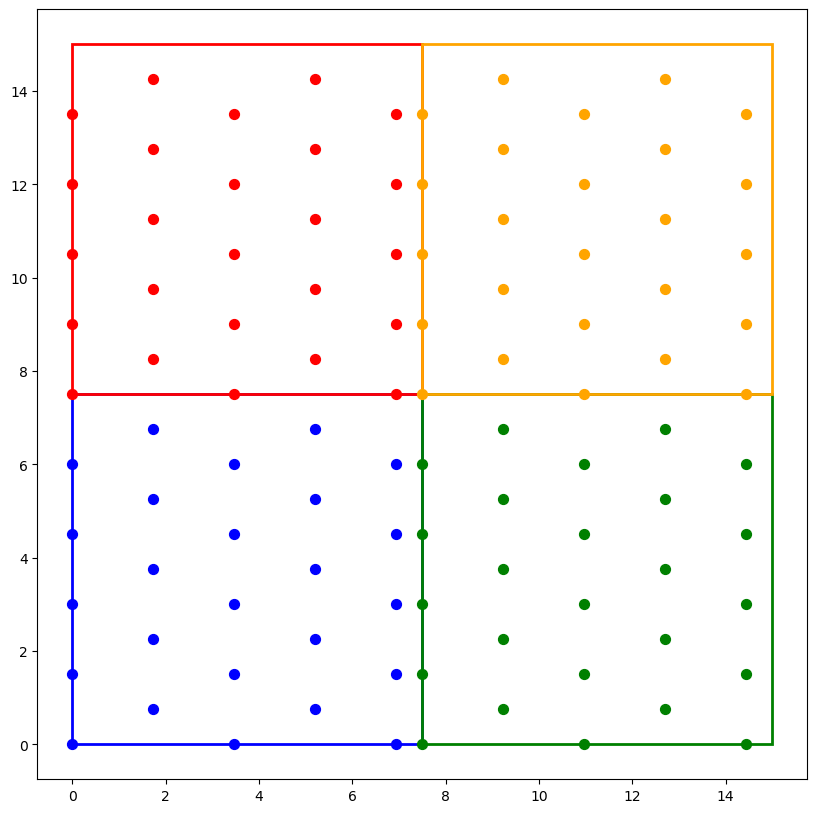

In [21]:
# Create the scatter plot
fig, ax = plt.subplots(1,1,figsize=(10,10))
rect = Rectangle((0, 0), width=box_L, height=box_L, facecolor='none', edgecolor='b', linewidth=2)
ax.add_patch(rect)
rect = Rectangle((box_L, 0), width=box_L, height=box_L, facecolor='none', edgecolor='green', linewidth=2)
ax.add_patch(rect)
rect = Rectangle((0, box_L), width=box_L, height=box_L, facecolor='none', edgecolor='red', linewidth=2)
ax.add_patch(rect)
rect = Rectangle((box_L, box_L), width=box_L, height=box_L, facecolor='none', edgecolor='orange', linewidth=2)
ax.add_patch(rect)
ax.scatter(x_particles, y_particles, s=50, color='blue', marker='o') 
ax.scatter(x_particles+box_L, y_particles, s=50, color='green', marker='o') 
ax.scatter(x_particles, y_particles+box_L, s=50, color='red', marker='o') 
ax.scatter(x_particles+box_L, y_particles+box_L, s=50, color='orange', marker='o') 

ax.set_aspect('equal', adjustable='box') # Ensure equal aspect ratio for correct visualization
plt.show()

When looking at replicas (the red,green, and organge points) it becomes apparent that in a box with PBC our 2D hexagonal lattice has a pretty obvious stacking fault at the $x$ boundary. It looks good in the $y$ direction. 